In [1]:
import pandas as pd
import os
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Read in data

In [25]:
data = pd.read_csv("/home/ajankelow/jupyter/notebooks/tlv/diabetes-pregnency.csv") 


In [26]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Exploratory data analysis

In [27]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


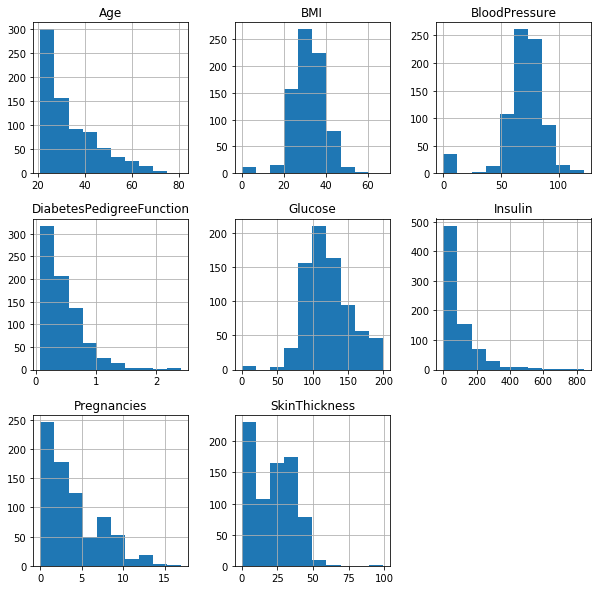

In [28]:
histo = data.hist(figsize = (10,10))

In [29]:
## The histograms above show some features with values of zero which are likely to be invalid entries

### Dealing with missing values (features with value of 0)

In [30]:
(data== 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [31]:
## Data values are missing 
## could replace values with zero with the median value in data set, should be aware that this could create bias in predicitng risk levels
#Skin Thickness and Glucose had 227 and 374 zero-values respectively. 
## KNN could also be used to impute values for the zero/ missing values, would need to normalise other variables to remove bias
## deleting values would be material loss of data for skin thickness and insulin
data_copy=data

In [32]:

## replace null value with median for insulin and skin thickness
#creating adjusted features for paramters with high number of missing values / need to be aware of bias - likely to lower the variance related to these feartures
data['SkinThicknessAdj']= np.where( (data['SkinThickness']==0),data['SkinThickness'].median(),data['SkinThickness'])
data['InsulinAdj']= np.where( (data['Insulin']==0),data['Insulin'].median(),data['Insulin'])


# pre-process Blood Pressure , BMI & Glucose invalid values 
# as blood pressure & glucose are very important for determing diabeties, so data should not be missing
# The number of missing values is very small so it should better to remove data points with missing values for these features
data=data[(data['BloodPressure']!=0) & (data['BMI']!=0) & (data['Glucose']!=0)]

In [33]:
(data== 0).sum(axis=0)

Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
SkinThicknessAdj              0
InsulinAdj                    0
dtype: int64

In [34]:
## The table above shows zero values have either been removed or estimated (creating new columns for adjusted insluin and blood pressure features)

In [35]:
data.count()
## 44 data entries removed from the data 

Pregnancies                 724
Glucose                     724
BloodPressure               724
SkinThickness               724
Insulin                     724
BMI                         724
DiabetesPedigreeFunction    724
Age                         724
SkinThicknessAdj            724
InsulinAdj                  724
dtype: int64

In [37]:
data.head(10)
## median for skin thickness is 23 and 30.5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,SkinThicknessAdj,InsulinAdj
0,6,148,72,35,0,33.6,0.627,50,35.0,30.5
1,1,85,66,29,0,26.6,0.351,31,29.0,30.5
2,8,183,64,0,0,23.3,0.672,32,23.0,30.5
3,1,89,66,23,94,28.1,0.167,21,23.0,94.0
4,0,137,40,35,168,43.1,2.288,33,35.0,168.0
5,5,116,74,0,0,25.6,0.201,30,23.0,30.5
6,3,78,50,32,88,31.0,0.248,26,32.0,88.0
8,2,197,70,45,543,30.5,0.158,53,45.0,543.0
10,4,110,92,0,0,37.6,0.191,30,23.0,30.5
11,10,168,74,0,0,38.0,0.537,34,23.0,30.5


In [38]:
##Removing old values for skin thickness and insulin
data=data.drop("SkinThickness",1).drop("Insulin",1)

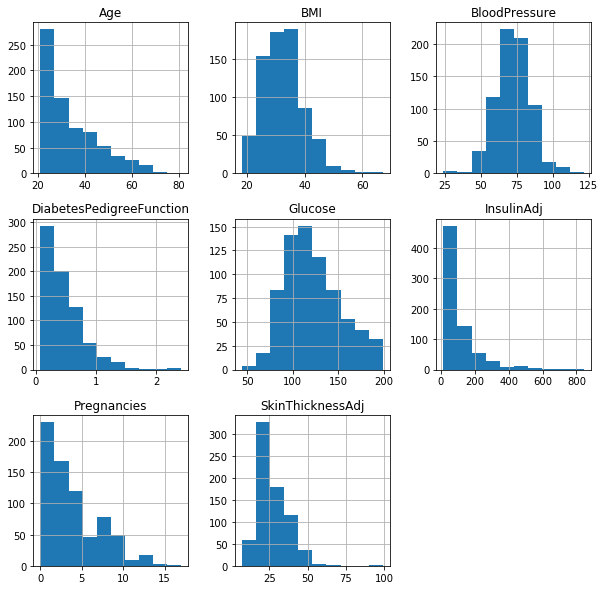

In [39]:
## Hitogram of inslin and skin featrures after missing values have been estimated by the sample mean 
histo = data.hist(figsize = (10,10))

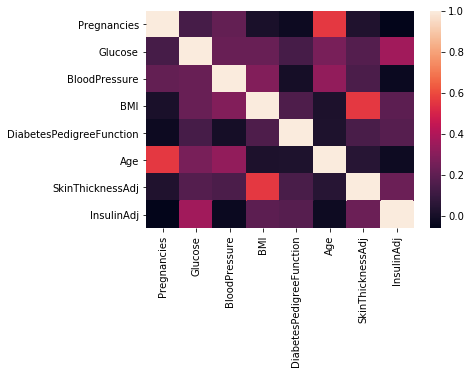

In [40]:
## look at a heatmap to evalaute the correlation between features
corr = data.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [41]:
corr

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,SkinThicknessAdj,InsulinAdj
Pregnancies,1.000000,0.134915,0.209668,0.012342,-0.025996,0.557066,0.026697,-0.061298
Glucose,0.134915,1.000000,0.223331,0.223276,0.136630,0.263560,0.173975,0.364065
BloodPressure,0.209668,0.223331,1.000000,0.287403,-0.000075,0.324897,0.149489,-0.029415
BMI,0.012342,0.223276,0.287403,1.000000,0.154858,0.020835,0.560071,0.194979
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.154858,1.000000,0.023098,0.141855,0.176468
Age,0.557066,0.263560,0.324897,0.020835,0.023098,1.000000,0.049803,-0.021280
SkinThicknessAdj,0.026697,0.173975,0.149489,0.560071,0.141855,0.049803,1.000000,0.229249
InsulinAdj,-0.061298,0.364065,-0.029415,0.194979,0.176468,-0.021280,0.229249,1.000000


In [42]:
## age and pregnancy have correlation in feature set
## skin thickness and BM

### Transformation layer to create compounded parameters

In [43]:
## First 2 rules were created according to rules section, rules 3 and 4 I created based on high importance that glucose and blood pressure have on signalling diabetes
data['rule1']= np.where( (data['Age']>45) & (data['BMI']>6.7),1,0)

data['rule2']= np.where( (data['Age']>35) & (data['BMI']>5.3) & (data['InsulinAdj']<20),1,0) 
# assume all people in data are female (no extra filter applied for this section)

## A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. 
##If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes.
m1= data['Glucose']>=126
m2=  (data['Glucose']<126) & (data['Glucose']>=100)
data['rule3'] = np.select([m1, m2],
                    [ 2, 1], 
                    default=0)    

#stage 1 hypertension is above 80 and high blood pressure is known to be correlated with diabetes

data['rule4']= np.where( (data['BloodPressure']>80),1,0)

## I am aware that rules created are simple and may be biased. Ie one glucose reading may not be a good enough measure on its own for diabetes.

### Define a risk level (score from 0-5) based off rules created

In [44]:
data['riskLevel']= data['rule1'] + data['rule2']+data['rule3']+ data['rule4'] 
## Risk level is a sum of the entries in each rule section

In [45]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,SkinThicknessAdj,InsulinAdj,rule1,rule2,rule3,rule4,riskLevel
0,6,148,72,33.6,0.627,50,35.0,30.5,1,0,2,0,3
1,1,85,66,26.6,0.351,31,29.0,30.5,0,0,0,0,0
2,8,183,64,23.3,0.672,32,23.0,30.5,0,0,2,0,2
3,1,89,66,28.1,0.167,21,23.0,94.0,0,0,0,0,0
4,0,137,40,43.1,2.288,33,35.0,168.0,0,0,2,0,2
5,5,116,74,25.6,0.201,30,23.0,30.5,0,0,1,0,1
6,3,78,50,31.0,0.248,26,32.0,88.0,0,0,0,0,0
8,2,197,70,30.5,0.158,53,45.0,543.0,1,0,2,0,3
10,4,110,92,37.6,0.191,30,23.0,30.5,0,0,1,1,2
11,10,168,74,38.0,0.537,34,23.0,30.5,0,0,2,0,2


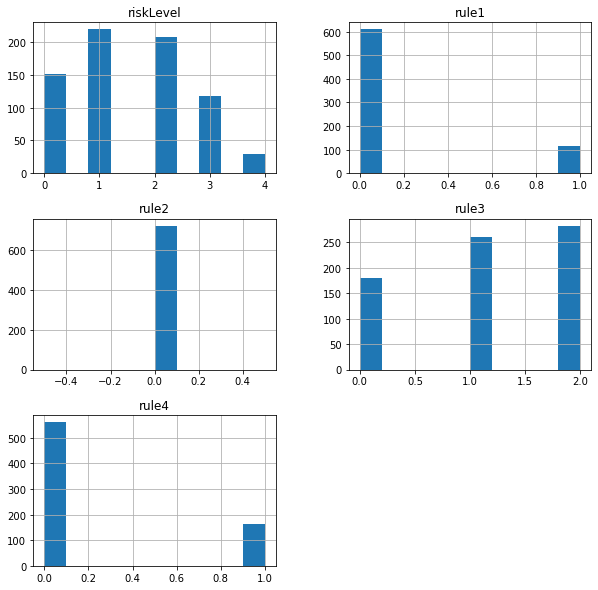

In [22]:
histo = data[['rule1','rule2', 'rule3', 'rule4', 'riskLevel']].hist(figsize = (10,10))

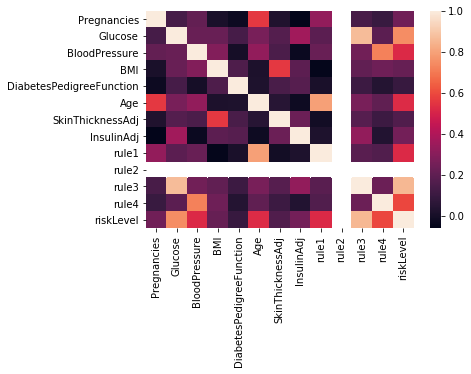

In [23]:
corr = data.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [24]:
data.to_csv("/home/ajankelow/jupyter/notebooks/tlv/output.csv")